# Kaggle Dataset: Advance Regression Techniques

## 1. Understanding Data

#### Quite Large Description of the Dataset. Please seek into "description.txt"

#### Brief of Columns:
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## 2. Understanding Task: 
To predict SalePrice(target variable) on the basis of other columns(independent variable).

## 3. Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
#This is known as magic inline function.
#When using the 'inline' backend, our matplotlib graphs will be included in our notebook, next to the code.

In [2]:
#reading dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#copying dataset
train_df = train_data.copy()
test_df = test_data.copy()

In [4]:
#in large dataset we use set_option to display maximum rows and columns.
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Here the one missing column is test_df must be our dependent variable (or target variable). 

## 4. Exploratory Data Analysis (EDA)

### 4.1. Understanding Variables and DataFrame

In [7]:
train_df.shape

(1460, 81)

In [8]:
test_df.shape

(1459, 80)

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

So, our train & test dataframe have datatypes like int, float and object. Also, our datasets have missing values.

### 4.2. Data Pre-Processing or Data Cleaning

#### 4.2.1. Missing Values

In [13]:
#count of missing values in columns having any missing values
train_df[train_df.columns[train_df.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
#percentage of missing values in columns having any missing values
((train_df[train_df.columns[train_df.isnull().any()]].isnull().sum()* 100)/(len(train_df)))

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

So, few of the columns have a lot of missing values, which can be treated. Ideally we can treat ~15-20% of the data, because more we make chnages in our dataset more we'll get deviated from the accuracy. So we'll remove such columns in further steps. But first let's check for our test_df.

In [15]:
#count of missing values in columns having any missing values
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [16]:
#percentage of missing values in columns having any missing values
((test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()* 100)/(len(test_df)))

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

As you can also observe our train_df has less missing values than test_df. So firstly get rid of columns having missing values more than 20%.

In [17]:
#dropping columns which have more than 20% missing values.
train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [18]:
#dropping columns which have more than 20% missing values.
test_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [19]:
#replacing missing values with median or mode according to their datatypes.

train_missing = train_df.columns[train_df.isnull().any()]
missing_obj = []
missing_not_obj = []

for i in train_missing:
    if train_df[i].dtypes == object:
        missing_obj.append(i)
    else:
        missing_not_obj.append(i)
        
for i in missing_obj:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

for i in missing_not_obj:
    train_df[i] = train_df[i].fillna(train_df[i].median())

In [20]:
#replacing missing values with median or mode according to their datatypes.

test_missing = test_df.columns[test_df.isnull().any()]
missing_obj = []
missing_not_obj = []

for i in test_missing:
    if test_df[i].dtypes == object:
        missing_obj.append(i)
    else:
        missing_not_obj.append(i)
        
for i in missing_obj:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])

for i in missing_not_obj:
    test_df[i] = test_df[i].fillna(test_df[i].median())

Now, as we have 2 datasets, one is for train and other is for test. Afterwards I'll only perform changes in train dataset and will also perform similar changes in test data without checking into it.

#### 4.2.2. Dividing columns on the basis of datatypes.

In [21]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [22]:
## Id is nothing but a serial number which will never affect our target variable.

train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

In [23]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
cols_num = [] #numerical columns
cols_obj = [] #object columns

for i in train_df.columns:
    if i in year_cols:
        pass
    elif train_df[i].dtypes == object:
        cols_obj.append(i)
    else:
        cols_num.append(i)

In [25]:
cols_num_dis = [] # discrete numerical values
cols_num_con = [] # continuous numerical values

for i in cols_num:
    if train_df[i].nunique()>12:
        cols_num_con.append(i)
    else:
        cols_num_dis.append(i)

#### 4.2.2. (a) Handling Continuous Numerical Variables

In [26]:
train_df[cols_num_con].head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


#### Skewness, Kurtosis and Outliers

**Skewness**: Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

**Kurtosis**: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.
- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

**Outliers**: They are data records that differ dramatically from all others, they distinguish themselves in one or more characteristics. In other words, an outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems.

In [27]:
#checking for skewness and kurtosis values in dataset.
for i in cols_num_con:
    print(f'For {i} Skewness is {round(train_df[i].skew(),2)} and Kurtosis is {round(train_df[i].kurtosis(),2)}')

For MSSubClass Skewness is 1.41 and Kurtosis is 1.58
For LotFrontage Skewness is 2.41 and Kurtosis is 21.91
For LotArea Skewness is 12.21 and Kurtosis is 203.24
For MasVnrArea Skewness is 2.68 and Kurtosis is 10.14
For BsmtFinSF1 Skewness is 1.69 and Kurtosis is 11.12
For BsmtFinSF2 Skewness is 4.26 and Kurtosis is 20.11
For BsmtUnfSF Skewness is 0.92 and Kurtosis is 0.47
For TotalBsmtSF Skewness is 1.52 and Kurtosis is 13.25
For 1stFlrSF Skewness is 1.38 and Kurtosis is 5.75
For 2ndFlrSF Skewness is 0.81 and Kurtosis is -0.55
For LowQualFinSF Skewness is 9.01 and Kurtosis is 83.23
For GrLivArea Skewness is 1.37 and Kurtosis is 4.9
For GarageArea Skewness is 0.18 and Kurtosis is 0.92
For WoodDeckSF Skewness is 1.54 and Kurtosis is 2.99
For OpenPorchSF Skewness is 2.36 and Kurtosis is 8.49
For EnclosedPorch Skewness is 3.09 and Kurtosis is 10.43
For 3SsnPorch Skewness is 10.3 and Kurtosis is 123.66
For ScreenPorch Skewness is 4.12 and Kurtosis is 18.44
For MiscVal Skewness is 24.48 and 

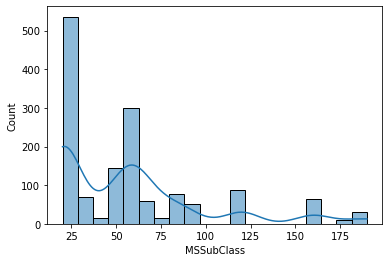

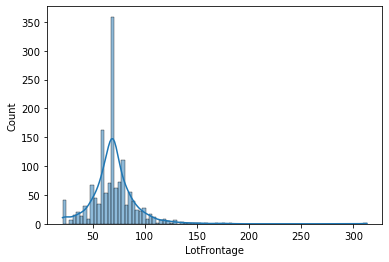

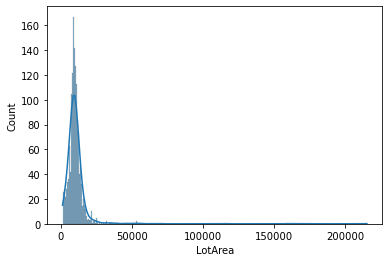

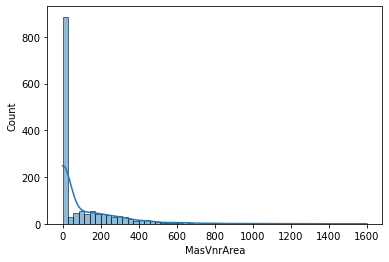

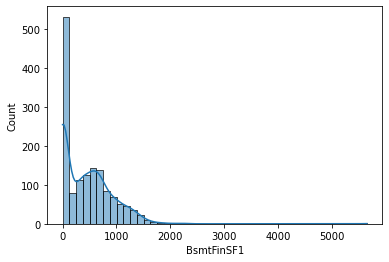

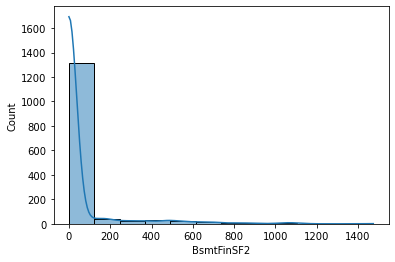

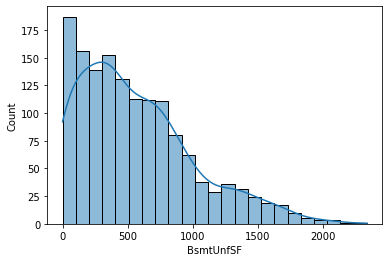

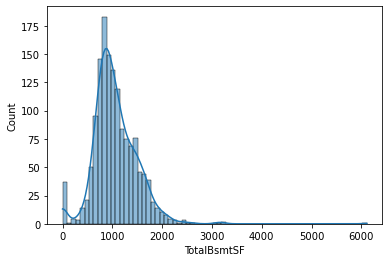

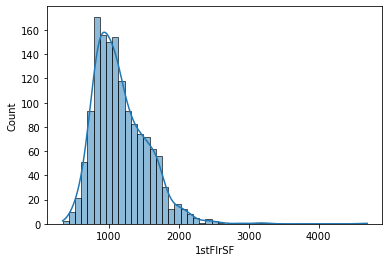

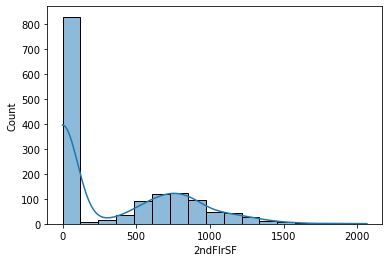

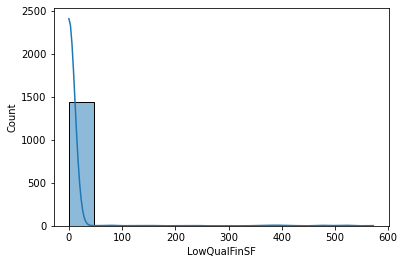

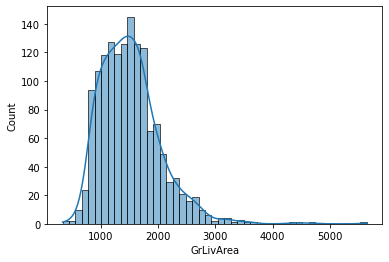

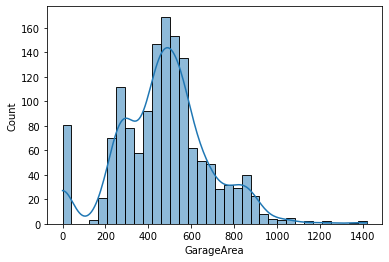

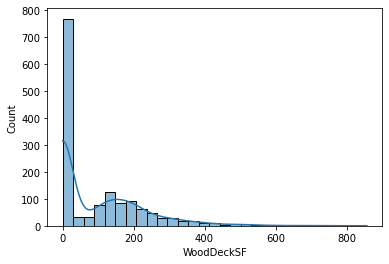

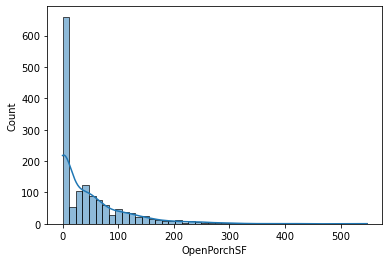

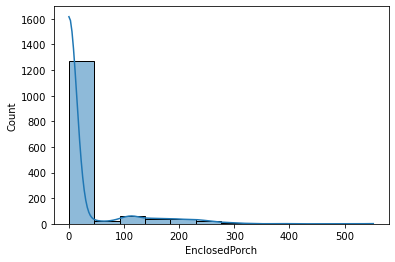

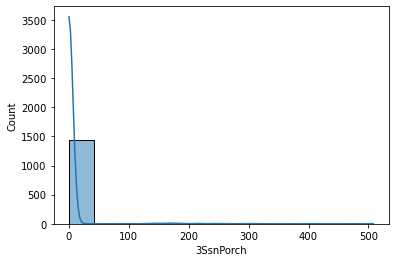

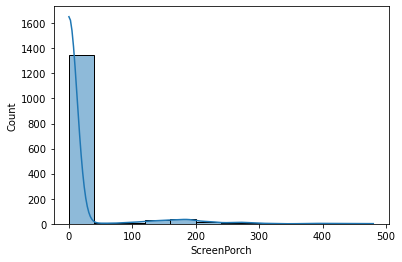

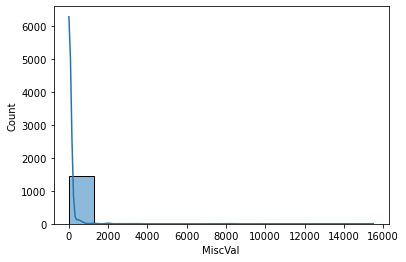

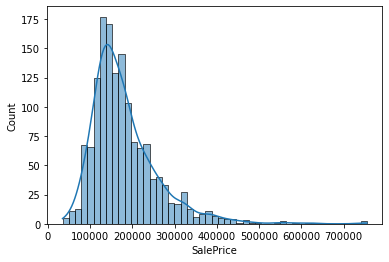

In [28]:
#plotting histplot for dataset to check skewness.
for i in cols_num_con:
    sns.histplot(train_df[i], kde=True)
    plt.show()

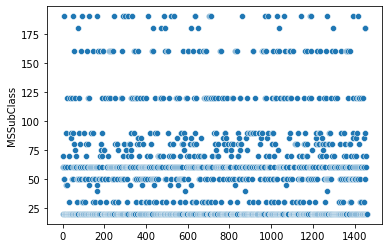

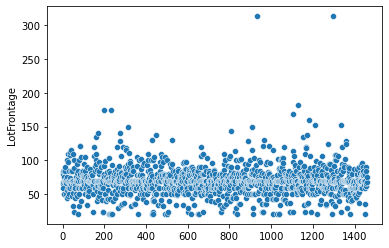

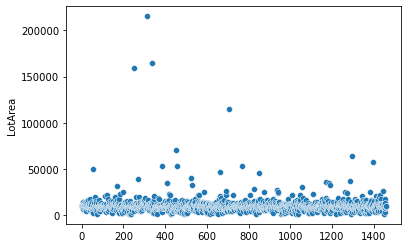

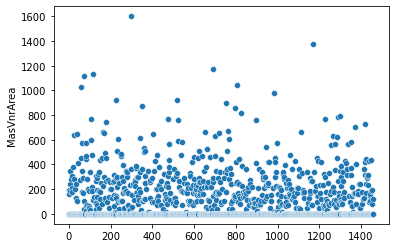

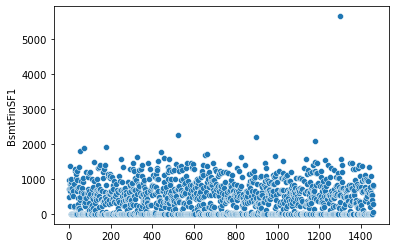

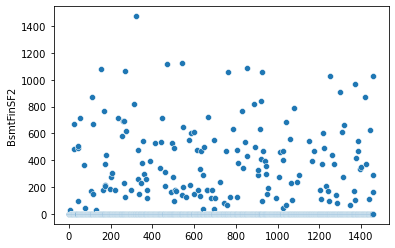

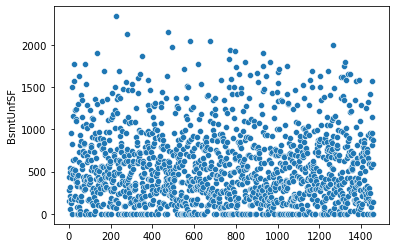

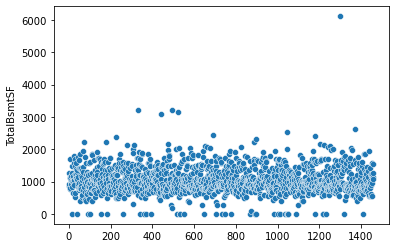

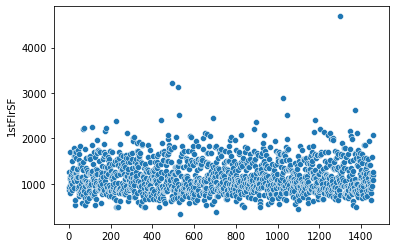

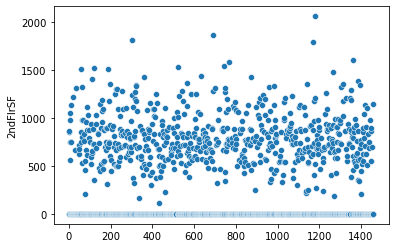

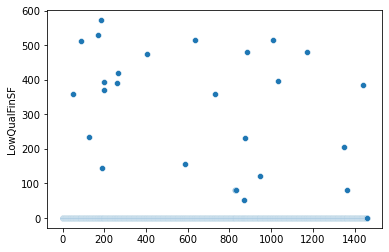

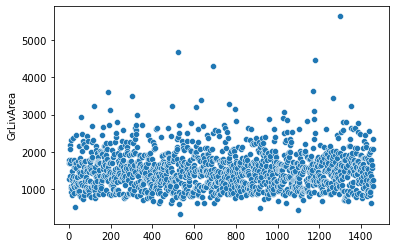

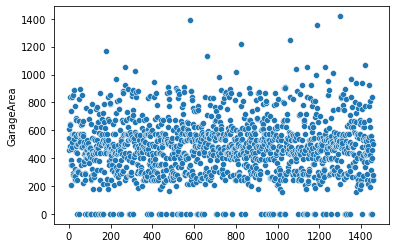

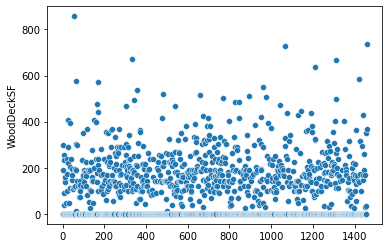

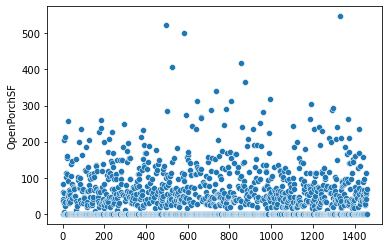

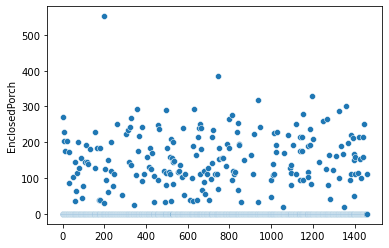

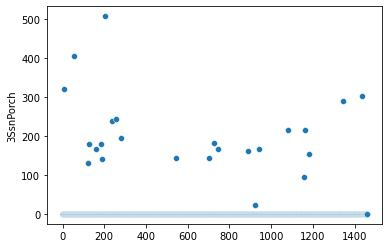

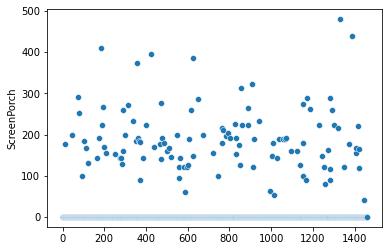

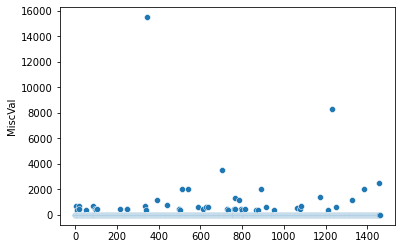

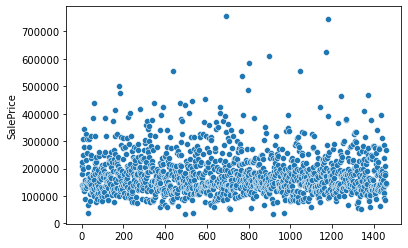

In [29]:
#plotting scatter-plot for a dataset to check outliers.
for i in cols_num_con:
    sns.scatterplot(data=train_df, x=train_df[i].index, y=i)
    plt.show()

As you can also observe almost all the columns have outliers and therefore skewed. One of the solution is Log Transformation.

**Log transformation**: Log transformation is a data transformation method in which it replaces each variable x with a log(x). Benefits of log transformation is, we can deal with outliers and skewness at the same time bacause as you know skewness happens because of outlier values present in our data.

But here as I noticed many of the columns have 0 values so, what I'm going to do is apply log(x+1) instead of log(x) because log 0 is undefined. It's not a real number, because you can never get zero by raising anything to the power of anything else. 

So, what I'm going to do is log transform only those values which do not have any 0s in it.

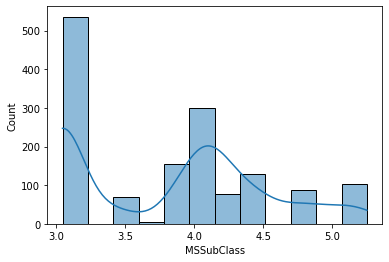

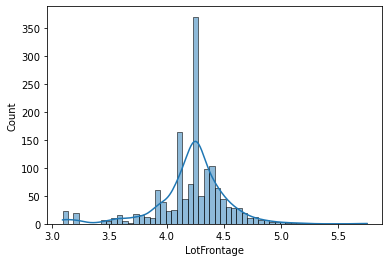

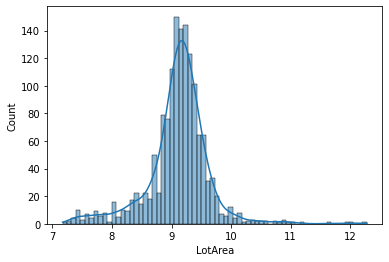

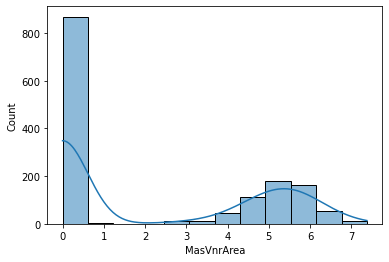

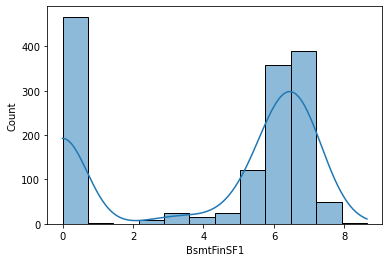

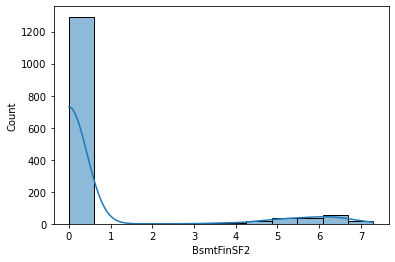

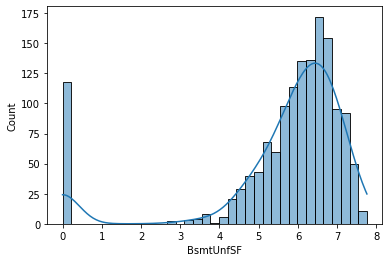

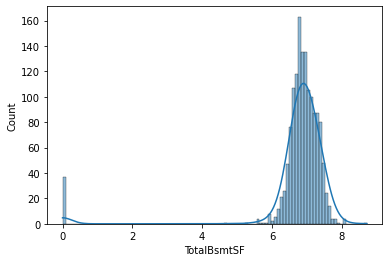

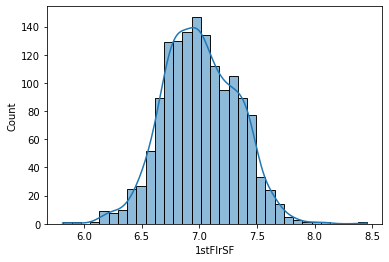

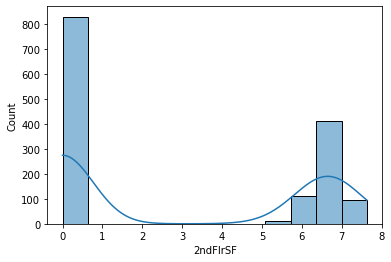

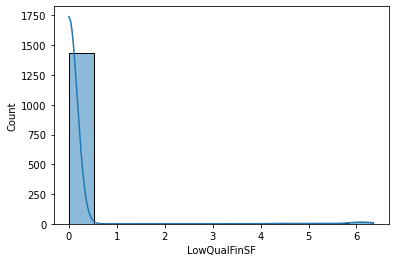

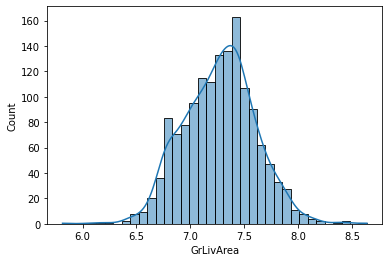

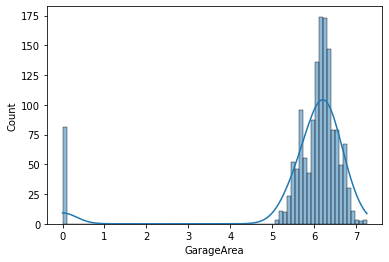

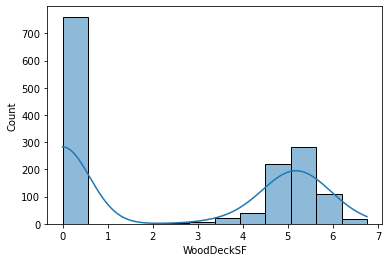

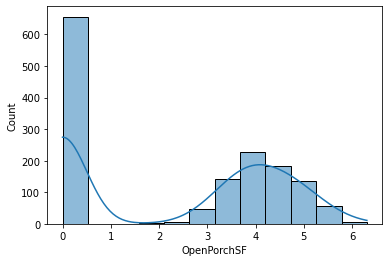

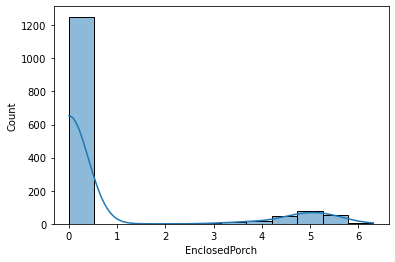

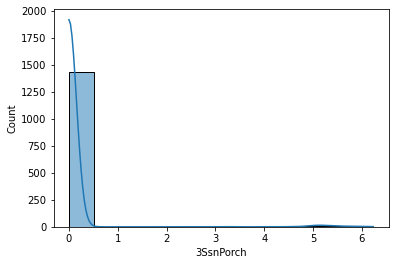

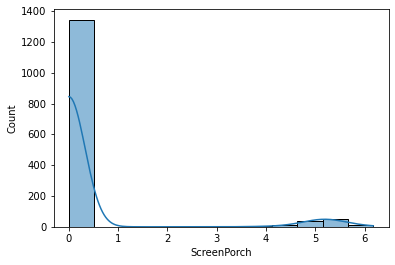

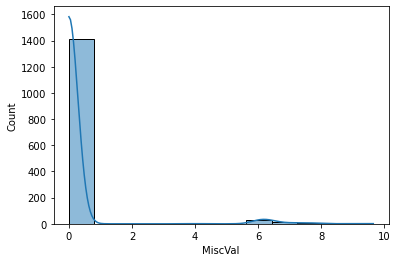

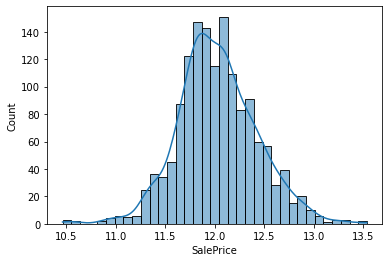

In [30]:
#checking our columns after outliers removal.
for i in cols_num_con:
    train_df[i] = np.log(train_df[i]+1)
    sns.histplot(train_df[i], kde=True)
    plt.show()

In [31]:
train_df[cols_num_con].head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,12.247699
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,12.109016
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,12.317171
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,11.849405
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,12.429220


In [32]:
cols_num_com = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal']
for i in cols_num_com:
    test_df[i] = np.log(test_df[i]+1)

Done with all continuous numerical columns.

#### 4.2.2. (b) Handling Discrete Numerical Variables

In [33]:
train_df[cols_num_dis].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


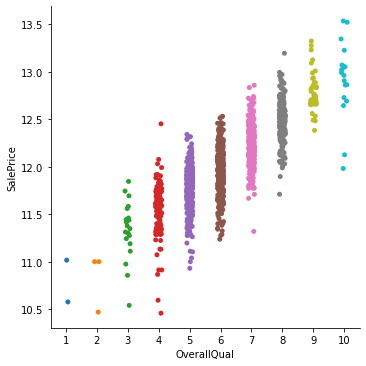

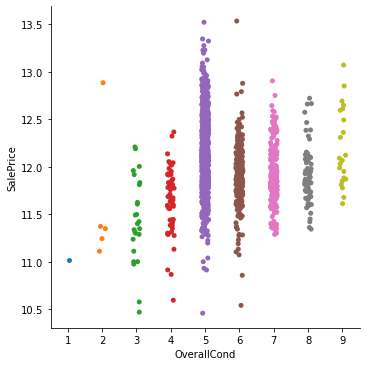

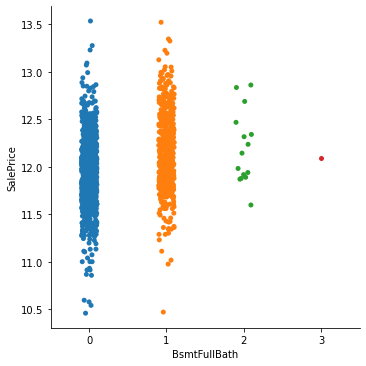

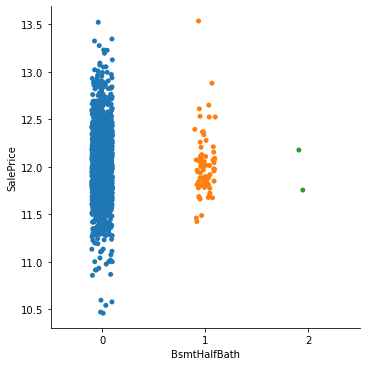

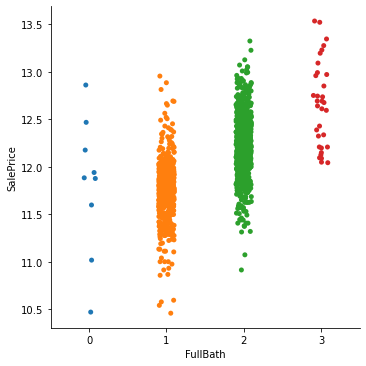

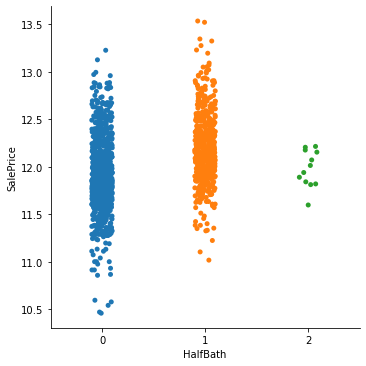

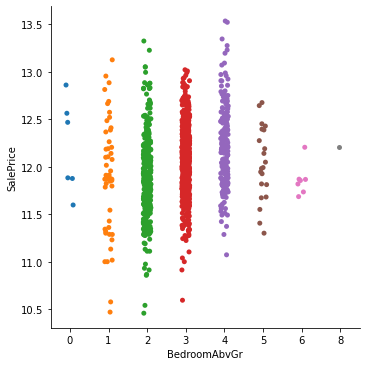

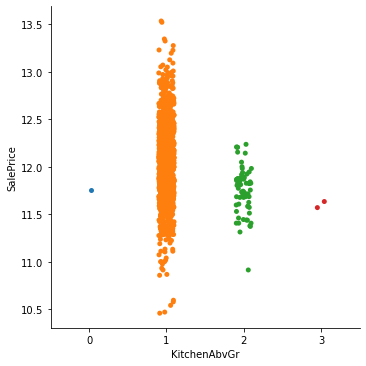

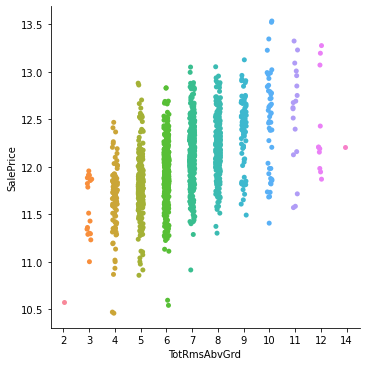

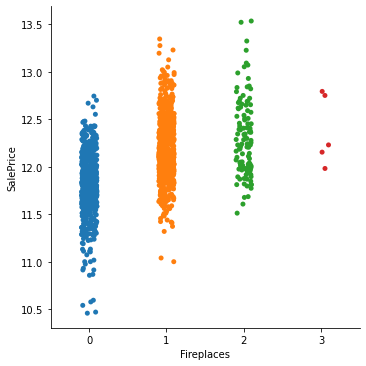

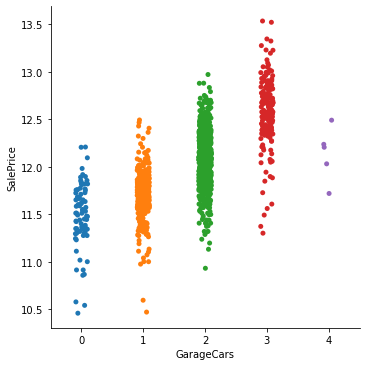

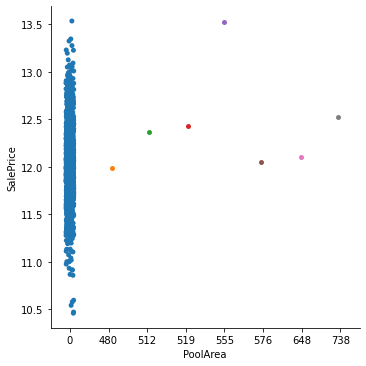

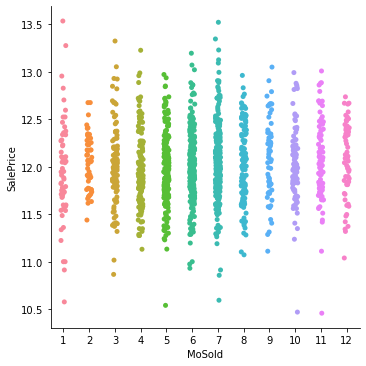

In [34]:
for i in cols_num_dis:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

In [35]:
Qual = train_df.groupby(['OverallQual']).SalePrice.agg([len, min, max])
Qual

,len,min,max
OverallQual,,,
1,2.0,10.579005,11.018646
2,3.0,10.471978,11.002117
3,20.0,10.542733,11.846544
4,116.0,10.460271,12.452937
5,397.0,10.933000,12.341263
6,374.0,11.238502,12.531776
7,319.0,11.320566,12.858322
8,168.0,11.711785,13.195616
9,43.0,12.384223,13.323929


In [36]:
train_df['OverallQual'] = np.where((train_df.OverallQual>8 ), 8, train_df.OverallQual)
train_df['OverallQual'] = np.where((train_df.OverallQual<4 ), 4, train_df.OverallQual)

test_df['OverallQual'] = np.where((test_df.OverallQual>8 ), 8, test_df.OverallQual)
test_df['OverallQual'] = np.where((test_df.OverallQual<4 ), 4, test_df.OverallQual)

In [37]:
Cond = train_df.groupby(['OverallCond']).SalePrice.agg([len, min, max])
Cond

,len,min,max
OverallCond,,,
1,1.0,11.018646,11.018646
2,5.0,11.112463,12.885205
3,25.0,10.471978,12.209193
4,57.0,10.596660,12.367345
5,821.0,10.460271,13.521141
6,252.0,10.542733,13.534474
7,205.0,11.288544,12.904210
8,72.0,11.344519,12.721889
9,22.0,11.612780,13.071072


In [38]:
train_df['OverallCond'] = np.where((train_df.OverallCond<3), 3, train_df.OverallCond)

test_df['OverallCond'] = np.where((test_df.OverallCond<3), 3, test_df.OverallCond)

In [39]:
BsmtFullBath = train_df.groupby(['BsmtFullBath']).SalePrice.agg([len, min, max])
BsmtFullBath

,len,min,max
BsmtFullBath,,,
0,856.0,10.460271,13.534474
1,588.0,10.471978,13.521141
2,15.0,11.598736,12.861001
3,1.0,12.095147,12.095147


In [40]:
train_df['BsmtFullBath'] = np.where((train_df.BsmtFullBath!=0), 1, train_df.BsmtFullBath)

test_df['BsmtFullBath'] = np.where((test_df.BsmtFullBath!=0), 1, test_df.BsmtFullBath)

In [41]:
BsmtHalfBath = train_df.groupby(['BsmtHalfBath']).SalePrice.agg([len, min, max])
BsmtHalfBath

,len,min,max
BsmtHalfBath,,,
0,1378.0,10.460271,13.521141
1,80.0,11.424105,13.534474
2,2.0,11.755879,12.176654


In [42]:
train_df['BsmtHalfBath'] = np.where((train_df.BsmtHalfBath!=0), 1, train_df.BsmtHalfBath)

test_df['BsmtHalfBath'] = np.where((test_df.BsmtHalfBath!=0), 1, test_df.BsmtHalfBath)

In [43]:
FullBath = train_df.groupby(['FullBath']).SalePrice.agg([len, min, max])
FullBath

,len,min,max
FullBath,,,
0,9.0,10.471978,12.861001
1,650.0,10.460271,12.955130
2,768.0,10.915107,13.323929
3,33.0,12.043560,13.534474


In [44]:
train_df['FullBath'] = np.where((train_df.FullBath!=0 ), 1, train_df.FullBath)

test_df['FullBath'] = np.where((test_df.FullBath!=0 ), 1, test_df.FullBath)

In [45]:
HalfBath = train_df.groupby(['HalfBath']).SalePrice.agg([len, min, max])
HalfBath

,len,min,max
HalfBath,,,
0,913.0,10.460271,13.226725
1,535.0,11.018646,13.534474
2,12.0,11.598736,12.215037


In [46]:
train_df['HalfBath'] = np.where((train_df.HalfBath!=0 ), 1, train_df.HalfBath)

test_df['HalfBath'] = np.where((test_df.HalfBath!=0 ), 1, test_df.HalfBath)

In [47]:
BedroomAbvGr = train_df.groupby(['BedroomAbvGr']).SalePrice.agg([len, min, max])
BedroomAbvGr

,len,min,max
BedroomAbvGr,,,
0,6.0,11.598736,12.861001
1,50.0,10.471978,13.126033
2,358.0,10.460271,13.323929
3,804.0,10.596660,13.021329
4,213.0,11.074436,13.534474
5,21.0,11.302217,12.676079
6,7.0,11.686887,12.206078
8,1.0,12.206078,12.206078


In [48]:
train_df['BedroomAbvGr'] = np.where((train_df.BedroomAbvGr<2 ), 2, train_df.BedroomAbvGr)
train_df['BedroomAbvGr'] = np.where((train_df.BedroomAbvGr>4 ), 4, train_df.BedroomAbvGr)

test_df['BedroomAbvGr'] = np.where((test_df.BedroomAbvGr<2 ), 2, test_df.BedroomAbvGr)
test_df['BedroomAbvGr'] = np.where((test_df.BedroomAbvGr>4 ), 4, test_df.BedroomAbvGr)

In [49]:
KitchenAbvGr = train_df.groupby(['KitchenAbvGr']).SalePrice.agg([len, min, max])
KitchenAbvGr

,len,min,max
KitchenAbvGr,,,
0,1.0,11.755879,11.755879
1,1392.0,10.460271,13.534474
2,65.0,10.915107,12.237092
3,2.0,11.571204,11.635152


In [50]:
train_df['KitchenAbvGr'] = np.where((train_df.KitchenAbvGr<1 ), 1, train_df.KitchenAbvGr)
train_df['KitchenAbvGr'] = np.where((train_df.KitchenAbvGr>2 ), 2, train_df.KitchenAbvGr)

test_df['KitchenAbvGr'] = np.where((test_df.KitchenAbvGr<1 ), 1, test_df.KitchenAbvGr)
test_df['KitchenAbvGr'] = np.where((test_df.KitchenAbvGr>2 ), 2, test_df.KitchenAbvGr)

In [51]:
TotRmsAbvGrd = train_df.groupby(['TotRmsAbvGrd']).SalePrice.agg([len, min, max])
TotRmsAbvGrd

,len,min,max
TotRmsAbvGrd,,,
2,1.0,10.579005,10.579005
3,17.0,11.002117,11.956976
4,97.0,10.460271,12.468441
5,275.0,10.859018,12.880294
6,402.0,10.542733,12.832014
7,329.0,10.915107,13.049795
8,187.0,11.302217,13.053015
9,75.0,11.492733,13.126033
10,47.0,11.407576,13.534474


In [52]:
train_df['TotRmsAbvGrd'] = np.where((train_df.TotRmsAbvGrd>10 ), 10, train_df.TotRmsAbvGrd)
train_df['TotRmsAbvGrd'] = np.where((train_df.TotRmsAbvGrd<3 ), 3, train_df.TotRmsAbvGrd)

test_df['TotRmsAbvGrd'] = np.where((test_df.TotRmsAbvGrd>10 ), 10, test_df.TotRmsAbvGrd)
test_df['TotRmsAbvGrd'] = np.where((test_df.TotRmsAbvGrd<3 ), 3, test_df.TotRmsAbvGrd)

In [53]:
Fireplaces = train_df.groupby(['Fireplaces']).SalePrice.agg([len, min, max])
Fireplaces

,len,min,max
Fireplaces,,,
0,690.0,10.460271,12.744447
1,650.0,11.002117,13.345509
2,115.0,11.512935,13.534474
3,5.0,11.982935,12.793862


In [54]:
train_df['Fireplaces'] = np.where((train_df.Fireplaces!=0 ), 1, train_df.Fireplaces)

test_df['Fireplaces'] = np.where((test_df.Fireplaces!=0 ), 1, test_df.Fireplaces)

In [55]:
GarageCars = train_df.groupby(['GarageCars']).SalePrice.agg([len, min, max])
GarageCars

,len,min,max
GarageCars,,,
0,81.0,10.460271,12.208575
1,369.0,10.471978,12.493133
2,824.0,10.933000,12.971543
3,181.0,11.302217,13.534474
4,5.0,11.719948,12.491176


In [56]:
train_df['GarageCars'] = np.where((train_df.GarageCars==4 ), 3, train_df.GarageCars)

test_df['GarageCars'] = np.where((test_df.GarageCars==4 ), 3, test_df.GarageCars)

In [57]:
MoSold = train_df.groupby(['MoSold']).SalePrice.agg([len, min, max])
MoSold

,len,min,max
MoSold,,,
1,58.0,10.579005,13.534474
2,52.0,11.440366,12.676079
3,106.0,10.868587,13.323929
4,141.0,11.133143,13.226725
5,204.0,10.542733,12.971543
6,253.0,10.933000,13.195616
7,234.0,10.596660,13.521141
8,122.0,11.074436,12.962197
9,63.0,11.112463,13.049795


Done with Discrete Continuous Variables.

#### 4.2.2. (c) Handling Year Variables

In [58]:
train_df[year_cols].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


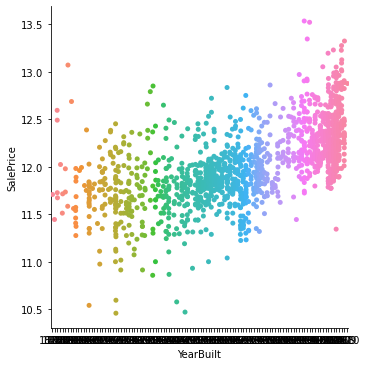

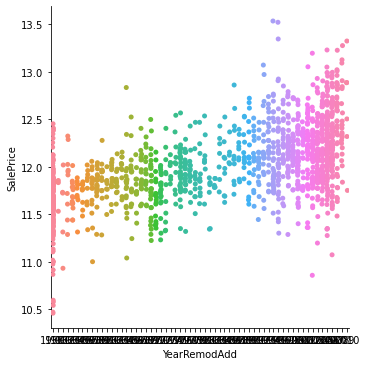

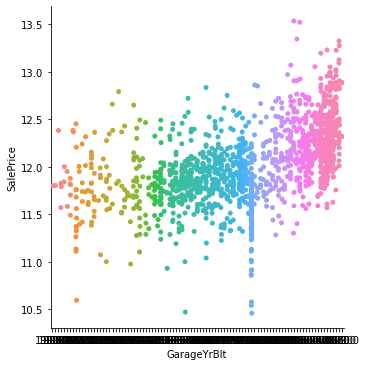

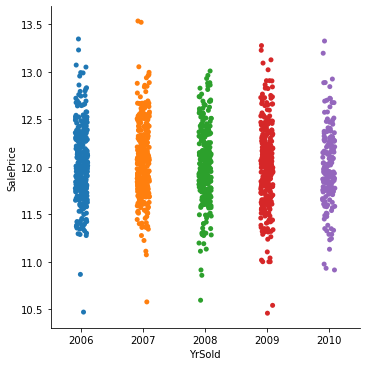

In [59]:
for i in year_cols:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

Quite satisfactory data distribution.
- Newer houses have more SalePrice than older ones.
- Something similar to Remodeled houses have higher SalePrice.
- Similar to GarageBuild

#### 4.2.2. (d) Handling Categorical Variables

In [60]:
train_df[cols_obj].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


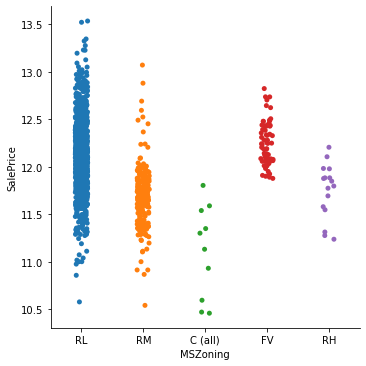

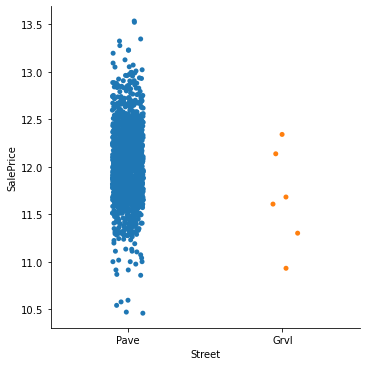

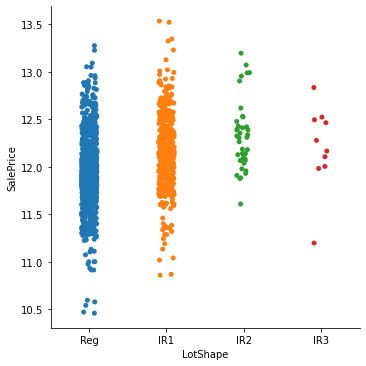

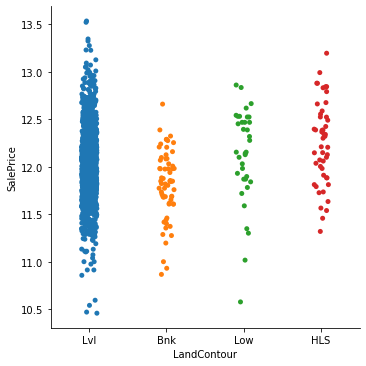

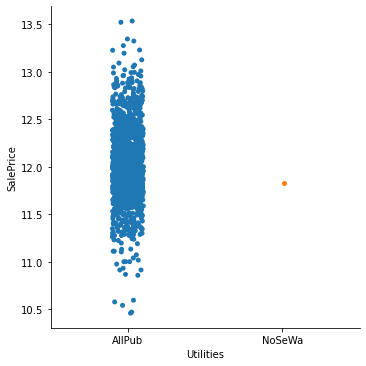

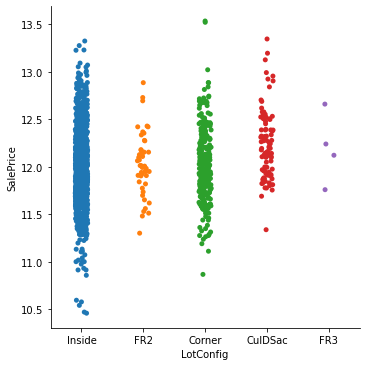

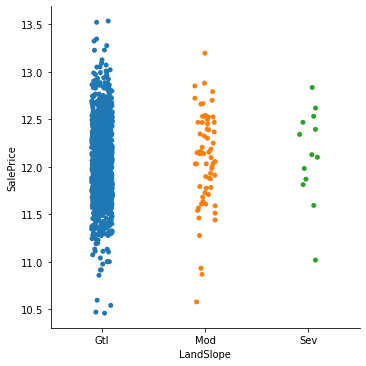

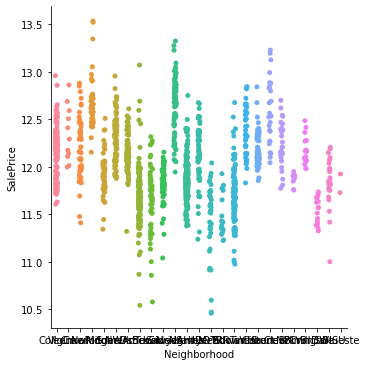

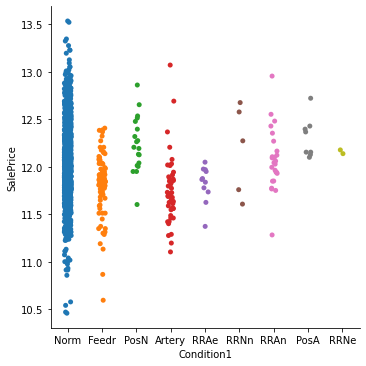

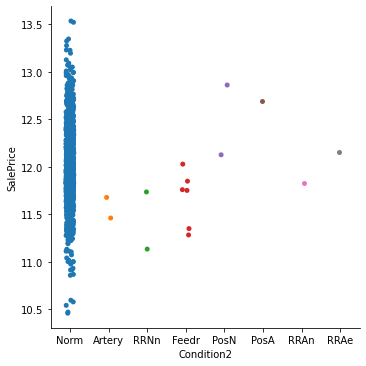

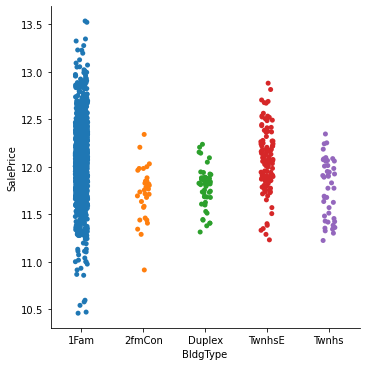

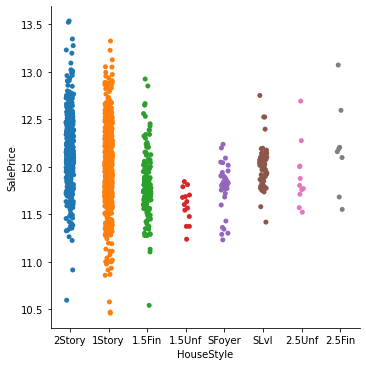

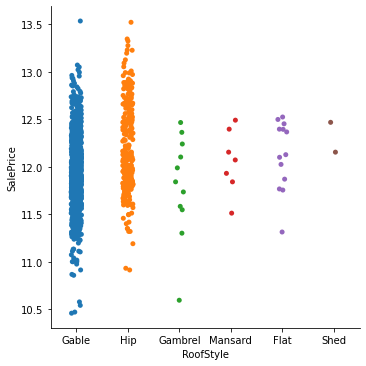

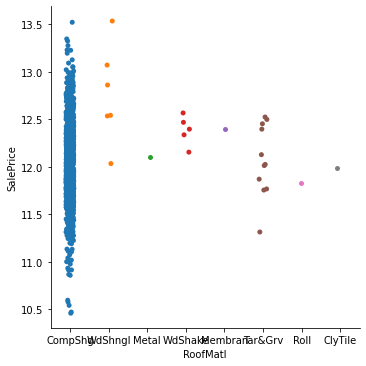

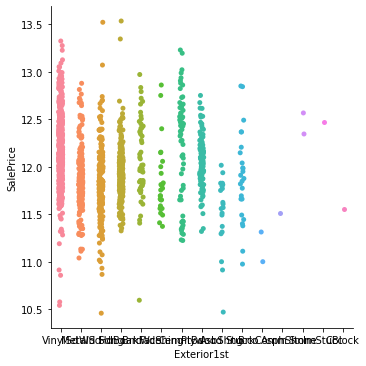

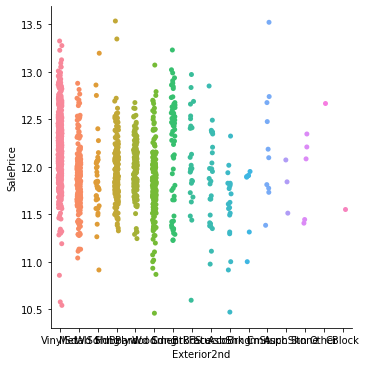

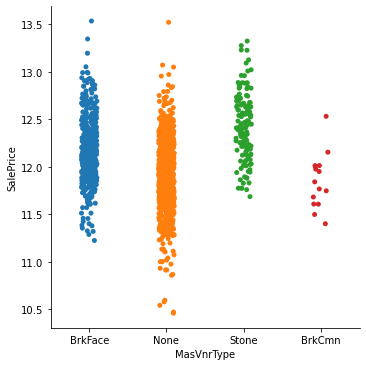

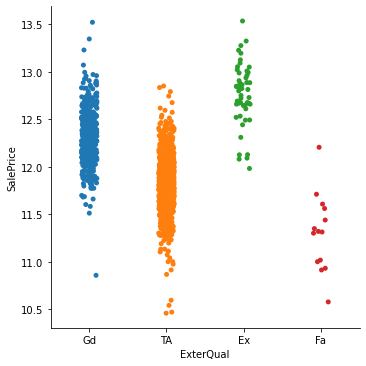

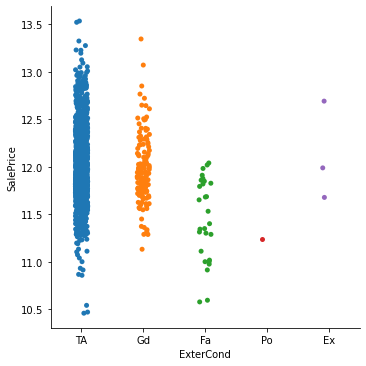

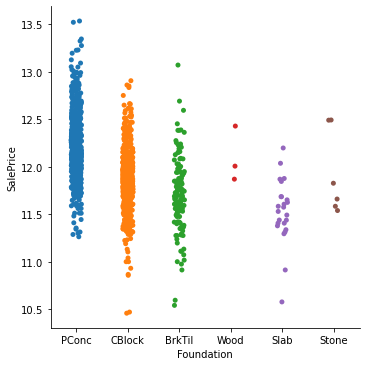

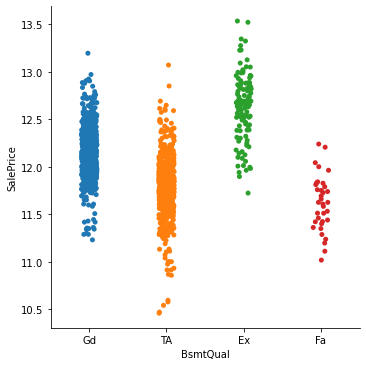

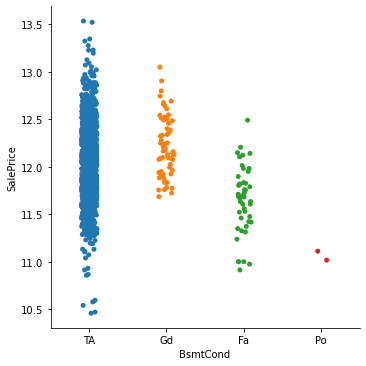

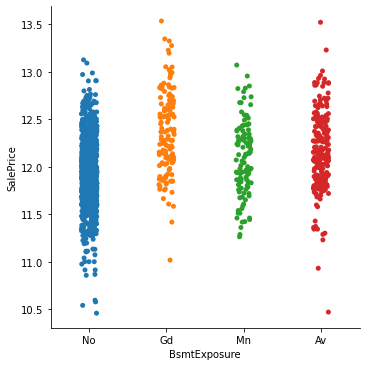

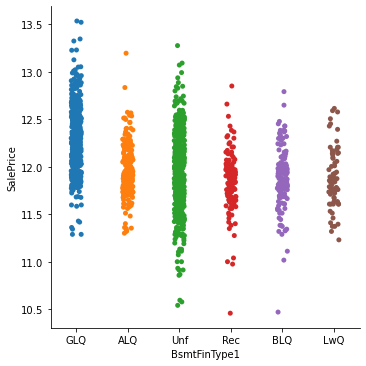

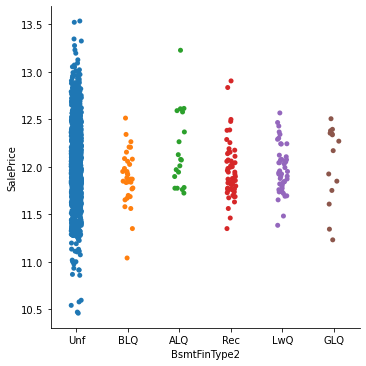

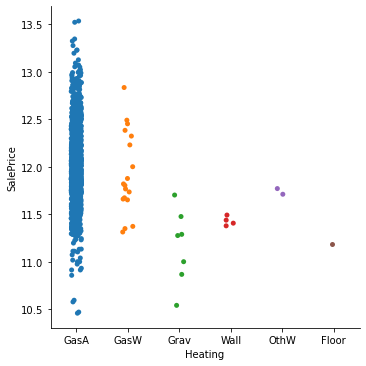

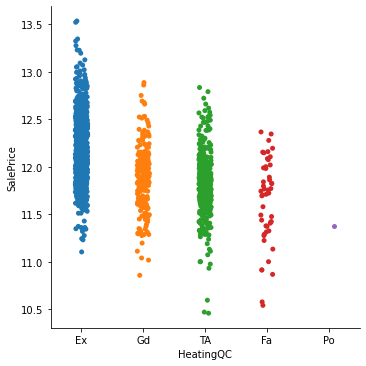

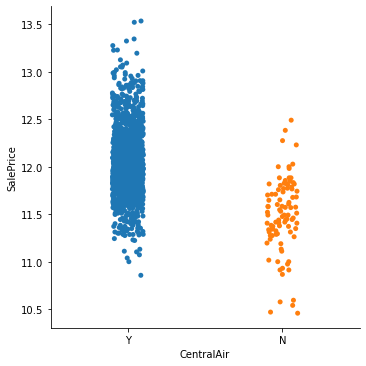

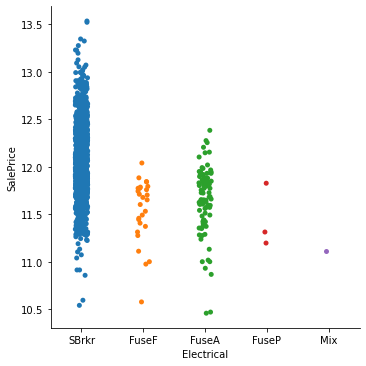

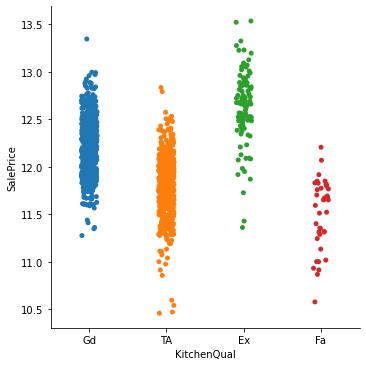

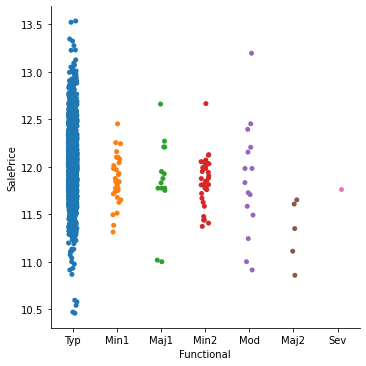

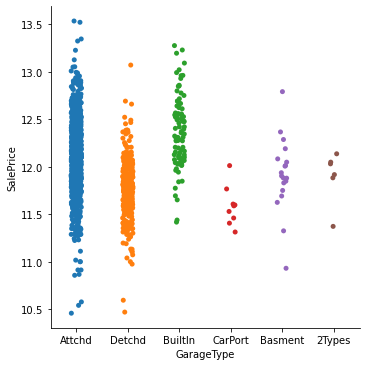

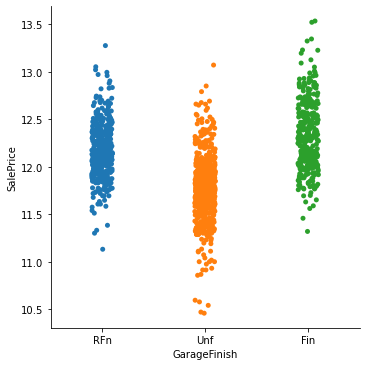

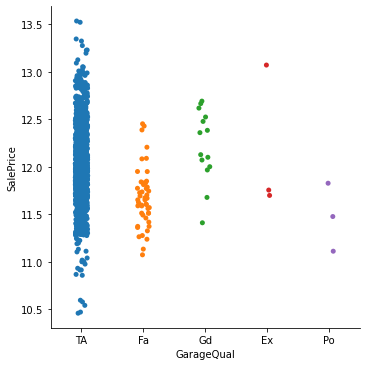

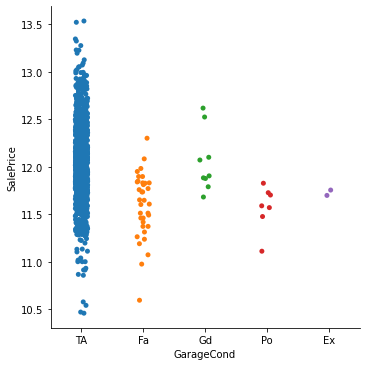

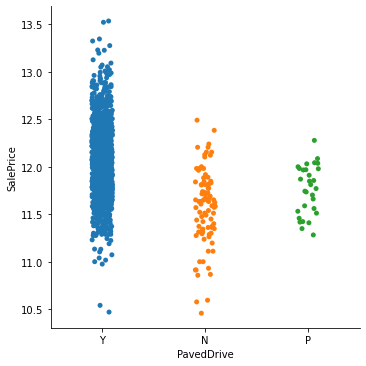

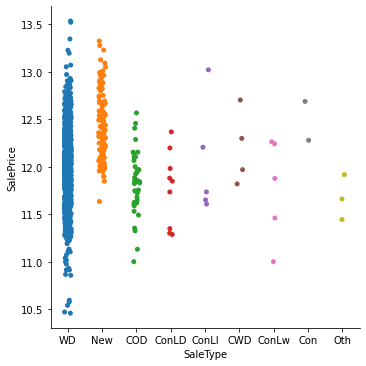

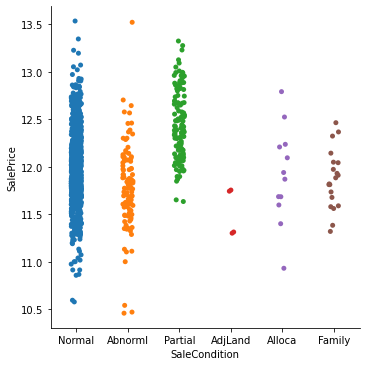

In [61]:
for i in cols_obj:
    sns.catplot(x = i, y = 'SalePrice', data = train_df)
    plt.show()

In [62]:
for i in cols_obj:
    print(train_df[i].value_counts(normalize=True)*100)
    print()

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timbe

As you can observe that occurance of some of the enteries of few columns have more than 90% of the values. Such columns needs to be dropped.

Also few columns columns have 1 entry with moderately highl value than rest of the columns, shoulld be transformed.

And, rest should be encoded.

In [63]:
train_df.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1, inplace=True)
test_df.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1, inplace=True)

In [64]:
MSZoning = train_df.groupby(['MSZoning']).SalePrice.agg([len, min, max])
MSZoning

,len,min,max
MSZoning,,,
C (all),10.0,10.460271,11.804856
FV,65.0,11.878631,12.823631
RH,16.0,11.238502,12.206078
RL,1151.0,10.579005,13.534474
RM,218.0,10.542733,13.071072


In [65]:
train_df['MSZoning'] = np.where((train_df.MSZoning=='RL' ), 1, 0)

test_df['MSZoning'] = np.where((test_df.MSZoning=='RL' ), 1, 0)

In [66]:
LotShape = train_df.groupby(['LotShape']).SalePrice.agg([len, min, max])
LotShape

,len,min,max
LotShape,,,
IR1,484.0,10.859018,13.534474
IR2,41.0,11.608245,13.195616
IR3,10.0,11.198228,12.834684
Reg,925.0,10.460271,13.275829


In [67]:
train_df['LotShape'] = np.where((train_df.LotShape=='Reg' ), 1, 0)

test_df['LotShape'] = np.where((test_df.LotShape=='Reg' ), 1, 0)

In [68]:
LandContour = train_df.groupby(['LandContour']).SalePrice.agg([len, min, max])
LandContour

,len,min,max
LandContour,,,
Bnk,63.0,10.868587,12.660331
HLS,50.0,11.320566,13.195616
Low,36.0,10.579005,12.861001
Lvl,1311.0,10.460271,13.534474


In [69]:
train_df['LandContour'] = np.where((train_df.LandContour=='Lvl' ), 1, 0)

test_df['LandContour'] = np.where((test_df.LandContour=='Lvl' ), 1, 0)

In [70]:
LotConfig = train_df.groupby(['LotConfig']).SalePrice.agg([len, min, max])
LotConfig

,len,min,max
LotConfig,,,
Corner,263.0,10.868587,13.534474
CulDSac,94.0,11.338584,13.345509
FR2,47.0,11.302217,12.885673
FR3,4.0,11.759793,12.660331
Inside,1052.0,10.460271,13.323929


In [71]:
train_df['LotConfig'] = np.where((train_df.LotConfig=='Inside' ), 1, 0)

test_df['LotConfig'] = np.where((test_df.LotConfig=='Inside' ), 1, 0)

In [72]:
Condition1 = train_df.groupby(['Condition1']).SalePrice.agg([len, min, max])
Condition1

,len,min,max
Condition1,,,
Artery,48.0,11.104972,13.071072
Feedr,81.0,10.596660,12.407384
Norm,1260.0,10.460271,13.534474
PosA,8.0,12.100718,12.721889
PosN,19.0,11.603689,12.861001
RRAe,11.0,11.373675,12.049425
RRAn,26.0,11.283525,12.955130
RRNe,2.0,12.138869,12.178193
RRNn,5.0,11.608245,12.676079


In [73]:
train_df['Condition1'] = np.where((train_df.Condition1=='Norm' ), 1, 0)

test_df['Condition1'] = np.where((test_df.Condition1=='Norm' ), 1, 0)

In [74]:
BldgType = train_df.groupby(['BldgType']).SalePrice.agg([len, min, max])
BldgType

,len,min,max
BldgType,,,
1Fam,1220.0,10.460271,13.534474
2fmCon,31.0,10.915107,12.341263
Duplex,52.0,11.314487,12.237092
Twnhs,43.0,11.225257,12.345839
TwnhsE,114.0,11.231901,12.880294


In [75]:
train_df['BldgType'] = np.where((train_df.BldgType=='1Fam' ), 1, 0)

test_df['BldgType'] = np.where((test_df.BldgType=='1Fam' ), 1, 0)

In [76]:
RoofStyle = train_df.groupby(['RoofStyle']).SalePrice.agg([len, min, max])
RoofStyle

,len,min,max
RoofStyle,,,
Flat,13.0,11.314487,12.524421
Gable,1141.0,10.460271,13.534474
Gambrel,11.0,10.596660,12.466516
Hip,286.0,10.915107,13.521141
Mansard,7.0,11.512935,12.491176
Shed,2.0,12.154785,12.468441


In [77]:
train_df['RoofStyle'] = np.where((train_df.RoofStyle=='Gable' ), 1, 0)

test_df['RoofStyle'] = np.where((test_df.RoofStyle=='Gable' ), 1, 0)

In [78]:
MasVnrType = train_df.groupby(['MasVnrType']).SalePrice.agg([len, min, max])
MasVnrType

,len,min,max
MasVnrType,,,
BrkCmn,15.0,11.401681,12.531776
BrkFace,445.0,11.225257,13.534474
None,872.0,10.460271,13.521141
Stone,128.0,11.686887,13.323929


In [79]:
train_df['MasVnrType'] = np.where((train_df.MasVnrType=='None' ), 0, 1)

test_df['MasVnrType'] = np.where((test_df.MasVnrType=='None' ), 0, 1)

In [80]:
ExterQual = train_df.groupby(['ExterQual']).SalePrice.agg([len, min, max])
ExterQual

,len,min,max
ExterQual,,,
Ex,52.0,11.982935,13.534474
Fa,14.0,10.579005,12.206078
Gd,488.0,10.859018,13.521141
TA,906.0,10.460271,12.850557


In [81]:
train_df['ExterQual'] = np.where((train_df.ExterQual=='Ex' ), 'Gd', train_df.ExterQual)
train_df['ExterQual'] = np.where((train_df.ExterQual=='Fa' ), 'TA', train_df.ExterQual)
train_df['ExterQual'] = np.where((train_df.ExterQual=='TA' ), 1, 0)

test_df['ExterQual'] = np.where((test_df.ExterQual=='Ex' ), 'Gd', test_df.ExterQual)
test_df['ExterQual'] = np.where((test_df.ExterQual=='Fa' ), 'TA', test_df.ExterQual)
test_df['ExterQual'] = np.where((test_df.ExterQual=='TA' ), 1, 0)

In [82]:
ExterCond = train_df.groupby(['ExterCond']).SalePrice.agg([len, min, max])
ExterCond

,len,min,max
ExterCond,,,
Ex,3.0,11.678448,12.691584
Fa,28.0,10.579005,12.040614
Gd,146.0,11.133143,13.345509
Po,1.0,11.245059,11.245059
TA,1282.0,10.460271,13.534474


In [83]:
train_df['ExterCond'] = np.where((train_df.ExterCond=='TA' ), 1, 0)

test_df['ExterCond'] = np.where((test_df.ExterCond=='TA' ), 1, 0)

In [84]:
Foundation = train_df.groupby(['Foundation']).SalePrice.agg([len, min, max])
Foundation

,len,min,max
Foundation,,,
BrkTil,146.0,10.542733,13.071072
CBlock,634.0,10.460271,12.906349
PConc,647.0,11.264477,13.534474
Slab,24.0,10.579005,12.198549
Stone,6.0,11.540317,12.493133
Wood,3.0,11.870607,12.429220


In [85]:
train_df['Foundation'] = np.where((train_df.Foundation=='PConc' ), 1, 0)

test_df['Foundation'] = np.where((test_df.Foundation=='PConc' ), 1, 0)

In [86]:
BsmtQual = train_df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])
BsmtQual

,len,min,max
BsmtQual,,,
Ex,121.0,11.724005,13.534474
Fa,35.0,11.018646,12.239996
Gd,618.0,11.231901,13.195616
TA,686.0,10.460271,13.071072


In [87]:
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='Ex' ), 'Gd', train_df.BsmtQual)
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='Fa' ), 'TA', train_df.BsmtQual)
train_df['BsmtQual'] = np.where((train_df.BsmtQual=='TA' ), 1, 0)

test_df['BsmtQual'] = np.where((test_df.BsmtQual=='Ex' ), 'Gd', test_df.BsmtQual)
test_df['BsmtQual'] = np.where((test_df.BsmtQual=='Fa' ), 'TA', test_df.BsmtQual)
test_df['BsmtQual'] = np.where((test_df.BsmtQual=='TA' ), 1, 0)

In [88]:
BsmtExposure = train_df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])
BsmtExposure

,len,min,max
BsmtQual,,,
0,739.0,11.231901,13.534474
1,721.0,10.460271,13.071072


In [89]:
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='Mn' ), 'No', train_df.BsmtExposure)
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='Gd' ), 'Av', train_df.BsmtExposure)
train_df['BsmtExposure'] = np.where((train_df.BsmtExposure=='No' ), 1, 0)

test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='Mn' ), 'No', test_df.BsmtExposure)
test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='Gd' ), 'Av', test_df.BsmtExposure)
test_df['BsmtExposure'] = np.where((test_df.BsmtExposure=='No' ), 1, 0)

In [90]:
GarageType = train_df.groupby(['GarageType']).SalePrice.agg([len, min, max])
GarageType

,len,min,max
GarageType,,,
2Types,6.0,11.373675,12.137264
Attchd,951.0,10.460271,13.534474
Basment,19.0,10.933000,12.791359
BuiltIn,88.0,11.418626,13.275829
CarPort,9.0,11.314487,12.013101
Detchd,387.0,10.471978,13.071072


In [91]:
train_df['GarageType'] = np.where((train_df.GarageType=='Attchd' ), 1, 0)

test_df['GarageType'] = np.where((test_df.GarageType=='Attchd' ), 1, 0)

In [92]:
SaleType = train_df.groupby(['SaleType']).SalePrice.agg([len, min, max])
SaleType

,len,min,max
SaleType,,,
COD,43.0,11.002117,12.567241
CWD,4.0,11.820418,12.703512
Con,2.0,12.279328,12.688502
ConLD,9.0,11.288544,12.367890
ConLI,5.0,11.608245,13.021329
ConLw,5.0,11.002117,12.264346
New,122.0,11.635152,13.323929
Oth,3.0,11.445727,11.918397
WD,1267.0,10.460271,13.534474


In [93]:
train_df['SaleType'] = np.where((train_df.SaleType=='WD' ), 1, 0)

test_df['SaleType'] = np.where((test_df.SaleType=='WD' ), 1, 0)

In [94]:
SaleCondition = train_df.groupby(['SaleCondition']).SalePrice.agg([len, min, max])
SaleCondition

,len,min,max
SaleCondition,,,
Abnorml,101.0,10.460271,13.521141
AdjLand,4.0,11.302217,11.755879
Alloca,12.0,10.933000,12.791359
Family,20.0,11.320566,12.464587
Normal,1198.0,10.579005,13.534474
Partial,125.0,11.635152,13.323929


In [95]:
train_df['SaleCondition'] = np.where((train_df.SaleCondition=='Normal' ), 1, 0)

test_df['SaleCondition'] = np.where((test_df.SaleCondition=='Normal' ), 1, 0)

In [96]:
#GarageFinish, KitchenQual, HeatingQC, BsmtFinType2, BsmtFinType1, Exterior2nd, Exterior1st, HouseStyle, Neighborhood

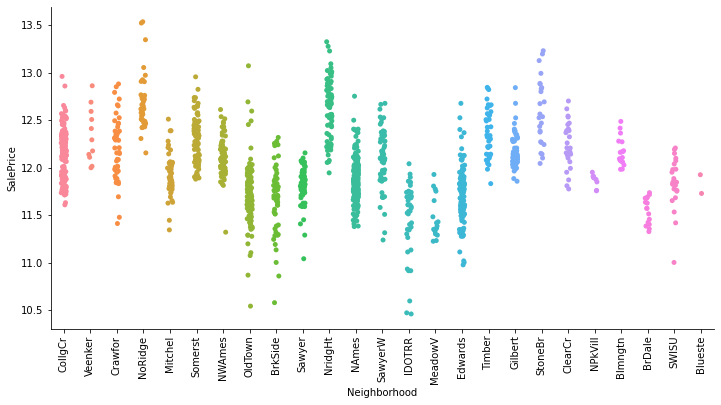

In [97]:
ax = sns.catplot(x = 'Neighborhood', y = 'SalePrice', data = train_df,height=5, aspect=2)
ax.set_xticklabels(rotation=90)

In [98]:
#By the Visualisation from the graph, I decided to convert entries from Neighbourhood column into three groups.
#[CollgCr, Veenker, Crawfor, Mitchel,  NWAmes, NAmes, SawyerW, Edwards, NPkVill] = 0
#[NoRidge, Somerst,NridgHt, Timber, Gilbert, StoneBr, ClearCr, Blmngth] = 1
#[OldTown, BrkSide, Sawyer, IDOTRR, MeadowV, BrDale, SWISU, Blueste] = 2

In [99]:
temp1 = ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel',  'NWAmes', 'NAmes', 'SawyerW', 'Edwards', 'NPkVill']
temp2 = ['NoRidge', 'Somerst' ,'NridgHt', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'Blmngtn']
temp3 = ['OldTown', 'BrkSide', 'Sawyer', 'IDOTRR', 'MeadowV', 'BrDale', 'SWISU', 'Blueste']

for i in temp1:
    train_df['Neighborhood'] = np.where((train_df.Neighborhood==i), 0, train_df.Neighborhood)
    
for j in temp2:
    train_df['Neighborhood'] = np.where((train_df.Neighborhood==j), 1, train_df.Neighborhood)
    
for k in temp3:
    train_df['Neighborhood'] = np.where((train_df.Neighborhood==k), 2, train_df.Neighborhood)
    

for i in temp1:
    test_df['Neighborhood'] = np.where((test_df.Neighborhood==i), 0, test_df.Neighborhood)
    
for j in temp2:
    test_df['Neighborhood'] = np.where((test_df.Neighborhood==j), 1, test_df.Neighborhood)
    
for k in temp3:
    test_df['Neighborhood'] = np.where((test_df.Neighborhood==k), 2, test_df.Neighborhood)

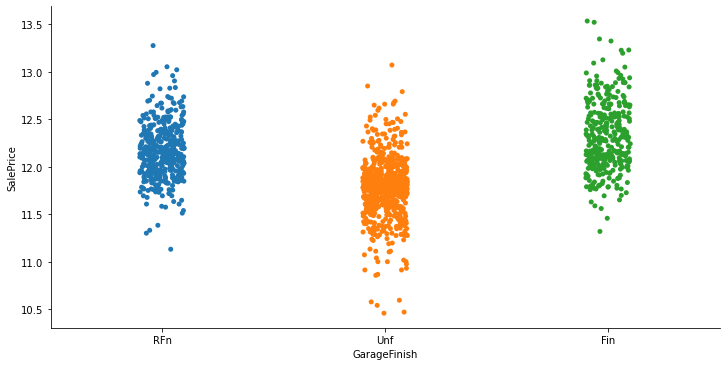

In [100]:
ax = sns.catplot(x = 'GarageFinish', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [101]:
train_df['GarageFinish'] = np.where((train_df.GarageFinish=='Unf' ), 1, 0)

test_df['GarageFinish'] = np.where((test_df.GarageFinish=='Unf' ), 1, 0)

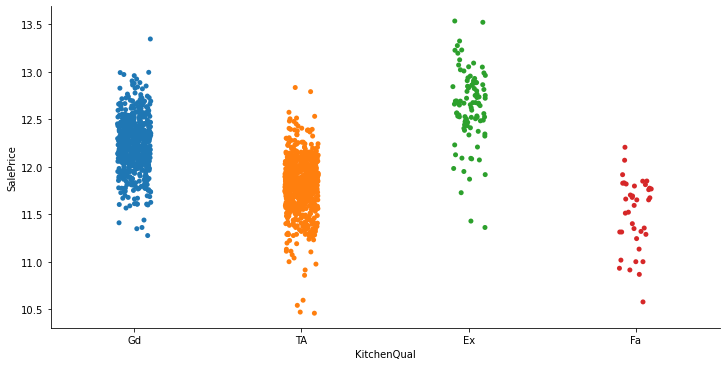

In [102]:
ax = sns.catplot(x = 'KitchenQual', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [103]:
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='Ex' ), 'Gd', train_df.KitchenQual)
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='Fa' ), 'TA', train_df.KitchenQual)
train_df['KitchenQual'] = np.where((train_df.KitchenQual=='TA' ), 1, 0)

test_df['KitchenQual'] = np.where((test_df.KitchenQual=='Ex' ), 'Gd', test_df.KitchenQual)
test_df['KitchenQual'] = np.where((test_df.KitchenQual=='Fa' ), 'TA', test_df.KitchenQual)
test_df['KitchenQual'] = np.where((test_df.KitchenQual=='TA' ), 1, 0)

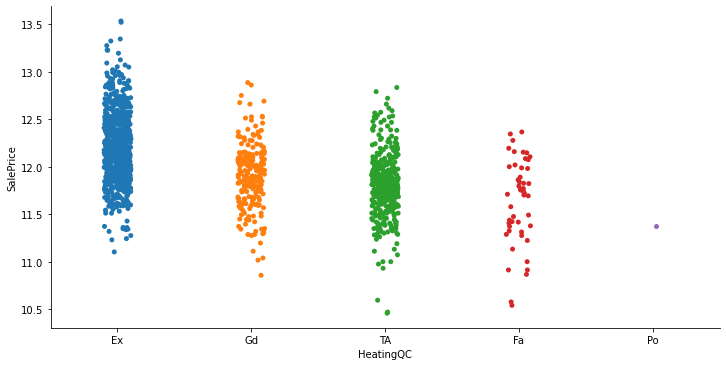

In [104]:
ax = sns.catplot(x = 'HeatingQC', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [105]:
train_df['HeatingQC'] = np.where((train_df.HeatingQC=='Ex' ), 1, 0)

test_df['HeatingQC'] = np.where((test_df.HeatingQC=='Ex' ), 1, 0)

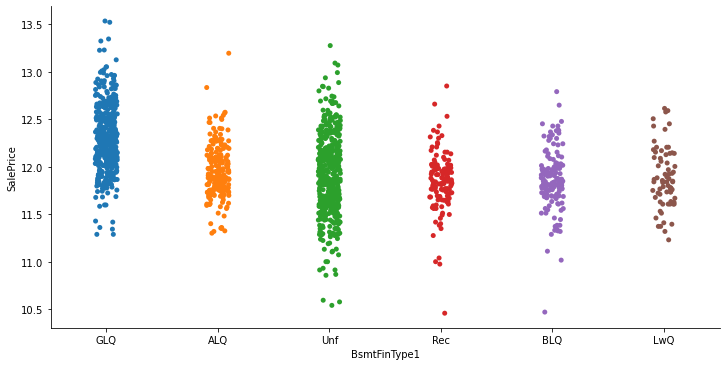

In [106]:
ax = sns.catplot(x = 'BsmtFinType1', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [107]:
train_df['BsmtFinType1'] = np.where((train_df.BsmtFinType1=='Rec'), 'Unf', train_df.BsmtFinType1)
train_df['BsmtFinType1'] = np.where((train_df.BsmtFinType1=='BLQ'), 'Unf', train_df.BsmtFinType1)
train_df['BsmtFinType1'] = np.where((train_df.BsmtFinType1=='ALQ'), 'GLQ', train_df.BsmtFinType1)
train_df['BsmtFinType1'] = np.where((train_df.BsmtFinType1=='LwQ'), 'GLQ', train_df.BsmtFinType1)
train_df['BsmtFinType1'] = np.where((train_df.BsmtFinType1=='Unf' ), 1, 0)

test_df['BsmtFinType1'] = np.where((test_df.BsmtFinType1=='Rec'), 'Unf', test_df.BsmtFinType1)
test_df['BsmtFinType1'] = np.where((test_df.BsmtFinType1=='BLQ'), 'Unf', test_df.BsmtFinType1)
test_df['BsmtFinType1'] = np.where((test_df.BsmtFinType1=='ALQ'), 'GLQ', test_df.BsmtFinType1)
test_df['BsmtFinType1'] = np.where((test_df.BsmtFinType1=='LwQ'), 'GLQ', test_df.BsmtFinType1)
test_df['BsmtFinType1'] = np.where((test_df.BsmtFinType1=='Unf' ), 1, 0)

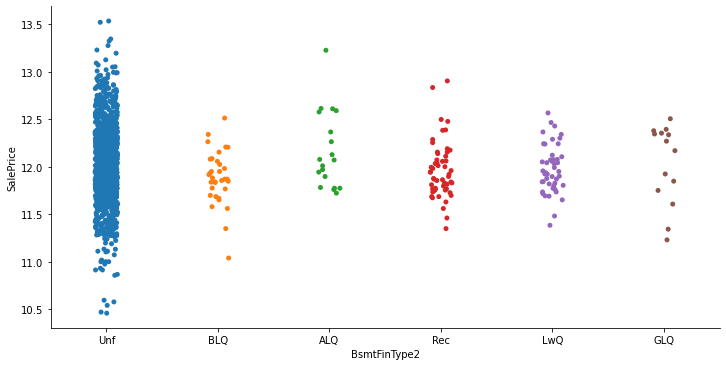

In [108]:
ax = sns.catplot(x = 'BsmtFinType2', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [109]:
train_df['BsmtFinType2'] = np.where((train_df.BsmtFinType2=='Unf' ), 1, 0)

test_df['BsmtFinType2'] = np.where((test_df.BsmtFinType2=='Unf' ), 1, 0)

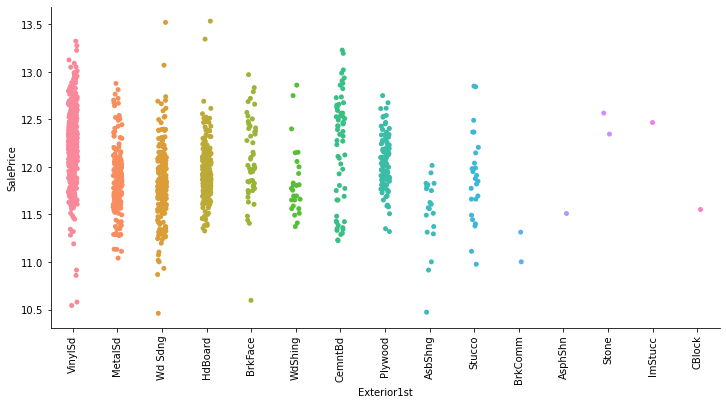

In [110]:
ax = sns.catplot(x = 'Exterior1st', y = 'SalePrice', data = train_df,height=5, aspect=2)
ax.set_xticklabels(rotation=90)

In [111]:
train_df['Exterior1st'] = np.where((train_df.Exterior1st=='AsbShng'), 'VinylSd', train_df.Exterior1st)
train_df['Exterior1st'] = np.where((train_df.Exterior1st=='BrkFace'), 'VinylSd', train_df.Exterior1st)
train_df['Exterior1st'] = np.where((train_df.Exterior1st=='Wd Sdng'), 'VinylSd', train_df.Exterior1st)
train_df['Exterior1st'] = np.where((train_df.Exterior1st=='VinylSd' ), 1, 0)

test_df['Exterior1st'] = np.where((test_df.Exterior1st=='AsbShng'), 'VinylSd', test_df.Exterior1st)
test_df['Exterior1st'] = np.where((test_df.Exterior1st=='BrkFace'), 'VinylSd', test_df.Exterior1st)
test_df['Exterior1st'] = np.where((test_df.Exterior1st=='Wd Sdng'), 'VinylSd', test_df.Exterior1st)
test_df['Exterior1st'] = np.where((test_df.Exterior1st=='VinylSd' ), 1, 0)

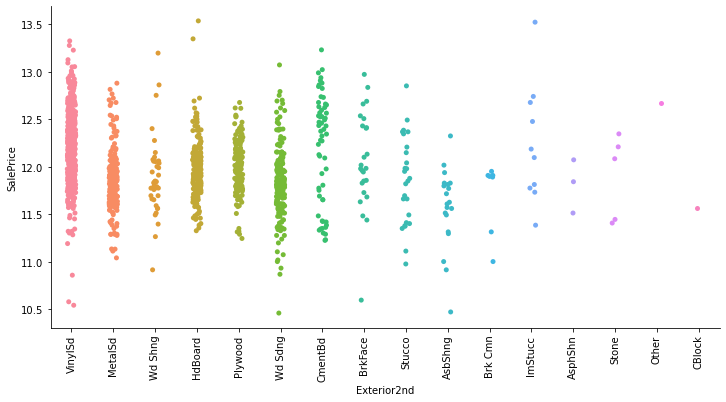

In [112]:
ax = sns.catplot(x = 'Exterior2nd', y = 'SalePrice', data = train_df,height=5, aspect=2)
ax.set_xticklabels(rotation=90)

In [113]:
train_df['Exterior2nd'] = np.where((train_df.Exterior2nd=='AsbShng'), 'VinylSd', train_df.Exterior2nd)
train_df['Exterior2nd'] = np.where((train_df.Exterior2nd=='BrkFace'), 'VinylSd', train_df.Exterior2nd)
train_df['Exterior2nd'] = np.where((train_df.Exterior2nd=='Wd Sdng'), 'VinylSd', train_df.Exterior2nd)
train_df['Exterior2nd'] = np.where((train_df.Exterior2nd=='VinylSd' ), 1, 0)

test_df['Exterior2nd'] = np.where((test_df.Exterior2nd=='AsbShng'), 'VinylSd', test_df.Exterior2nd)
test_df['Exterior2nd'] = np.where((test_df.Exterior2nd=='BrkFace'), 'VinylSd', test_df.Exterior2nd)
test_df['Exterior2nd'] = np.where((test_df.Exterior2nd=='Wd Sdng'), 'VinylSd', test_df.Exterior2nd)
test_df['Exterior2nd'] = np.where((test_df.Exterior2nd=='VinylSd' ), 1, 0)

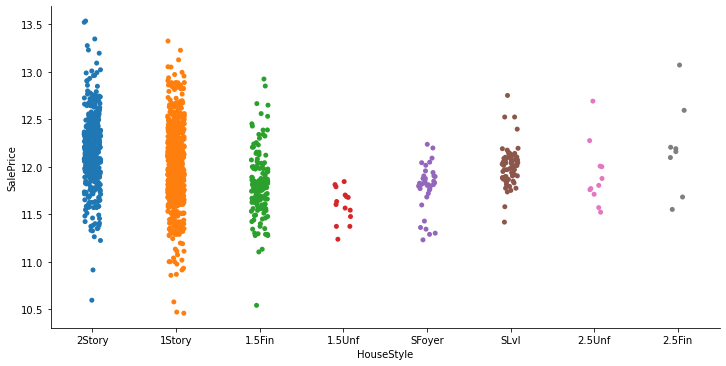

In [114]:
ax = sns.catplot(x = 'HouseStyle', y = 'SalePrice', data = train_df,height=5, aspect=2)

In [115]:
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='1.5Fin'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='1.5Unf'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='SFoyer'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='SLvl'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='2.5Unf'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='2.5Fin'), 'Other', train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='Other' ), 0, train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='1Story' ), 1, train_df.HouseStyle)
train_df['HouseStyle'] = np.where((train_df.HouseStyle=='2Story' ), 2, train_df.HouseStyle)

test_df['HouseStyle'] = np.where((test_df.HouseStyle=='1.5Fin'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='1.5Unf'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='SFoyer'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='SLvl'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='2.5Unf'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='2.5Fin'), 'Other', test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='Other' ), 0, test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='1Story' ), 1, test_df.HouseStyle)
test_df['HouseStyle'] = np.where((test_df.HouseStyle=='2Story' ), 2, test_df.HouseStyle)

That's it for Categorical Varibles.

### 4.3. Duplicate Columns.

In [116]:
#checking for duplicate rows
train_df[train_df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [117]:
test_df[test_df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


No duplicate rows in both of the dataframe.

So, we left with just two categorical columns i.e. Neighborhood and HouseStyle. Will perform One Hot Encoding for these two columns.

### 4.4. One-Hot Encoding

In [118]:
train_df['HouseStyle'] = pd.get_dummies(train_df['HouseStyle'])
train_df['Neighborhood'] = pd.get_dummies(train_df['Neighborhood'])

test_df['HouseStyle'] = pd.get_dummies(test_df['HouseStyle'])
test_df['Neighborhood'] = pd.get_dummies(test_df['Neighborhood'])

In [119]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,1,4.189655,9.042040,1,1,1,1,1,1,0,7,5,2003,2003,1,1,1,1,5.283204,0,1,1,0,1,0,6.561031,1,0.0,5.017280,6.753438,1,6.753438,6.751101,0.0,7.444833,1,0,1,1,3,1,0,8,0,1,2003.0,0,2,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,2008,1,1,12.247699
1,3.044522,1,4.394449,9.169623,1,1,0,1,0,1,0,6,8,1976,1976,1,0,0,0,0.000000,1,1,0,0,0,0,6.886532,1,0.0,5.652489,7.141245,1,7.141245,0.000000,0.0,7.141245,0,1,1,0,3,1,1,6,1,1,1976.0,0,2,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,2007,1,1,12.109016
2,4.110874,1,4.234107,9.328212,0,1,1,1,1,1,0,7,5,2001,2002,1,1,1,1,5.093750,0,1,1,0,1,0,6.188264,1,0.0,6.075346,6.825460,1,6.825460,6.765039,0.0,7.488294,1,0,1,1,3,1,0,6,1,1,2001.0,0,2,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0,0.0,9,2008,1,1,12.317171
3,4.262680,1,4.110874,9.164401,0,1,0,1,1,1,0,7,5,1915,1970,1,1,0,0,0.000000,1,1,0,1,1,0,5.379897,1,0.0,6.293419,6.629363,0,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,0,7,1,0,1998.0,1,3,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0,0.0,2,2006,1,0,11.849405
4,4.110874,1,4.442651,9.565284,0,1,0,0,1,1,0,8,5,2000,2000,1,1,1,1,5.860786,0,1,1,0,0,0,6.486161,1,0.0,6.196444,7.044033,1,7.044033,6.960348,0.0,7.695758,1,0,1,1,4,1,0,9,1,1,2000.0,0,3,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0,0.0,12,2008,1,1,12.429220


### 4.5. Feature Scaling
**Feature Scaling or Standardization**: It is a step of Data Pre-Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

Standardisation replaces the values by their Z scores.

In [120]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,1,4.189655,9.042040,1,1,1,1,1,1,0,7,5,2003,2003,1,1,1,1,5.283204,0,1,1,0,1,0,6.561031,1,0.0,5.017280,6.753438,1,6.753438,6.751101,0.0,7.444833,1,0,1,1,3,1,0,8,0,1,2003.0,0,2,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0,0.0,2,2008,1,1,12.247699
1,3.044522,1,4.394449,9.169623,1,1,0,1,0,1,0,6,8,1976,1976,1,0,0,0,0.000000,1,1,0,0,0,0,6.886532,1,0.0,5.652489,7.141245,1,7.141245,0.000000,0.0,7.141245,0,1,1,0,3,1,1,6,1,1,1976.0,0,2,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0,0.0,5,2007,1,1,12.109016
2,4.110874,1,4.234107,9.328212,0,1,1,1,1,1,0,7,5,2001,2002,1,1,1,1,5.093750,0,1,1,0,1,0,6.188264,1,0.0,6.075346,6.825460,1,6.825460,6.765039,0.0,7.488294,1,0,1,1,3,1,0,6,1,1,2001.0,0,2,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0,0.0,9,2008,1,1,12.317171
3,4.262680,1,4.110874,9.164401,0,1,0,1,1,1,0,7,5,1915,1970,1,1,0,0,0.000000,1,1,0,1,1,0,5.379897,1,0.0,6.293419,6.629363,0,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,0,7,1,0,1998.0,1,3,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0,0.0,2,2006,1,0,11.849405
4,4.110874,1,4.442651,9.565284,0,1,0,0,1,1,0,8,5,2000,2000,1,1,1,1,5.860786,0,1,1,0,0,0,6.486161,1,0.0,6.196444,7.044033,1,7.044033,6.960348,0.0,7.695758,1,0,1,1,4,1,0,9,1,1,2000.0,0,3,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0,0.0,12,2008,1,1,12.429220


### 4.6. Mulitcolinearity

**Multicollinearity**: Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

**Why not Multicollinearity?**: Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

**Detection of Multicollinearity**: Multicollinearity can be detected via various methods. One of the popular method is using VIF.

**VIF**: VIF stands for Variable Inflation Factors. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

In [121]:
X1 = train_df.drop(['SalePrice'], axis=1)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            2.502873e+06
MSSubClass       6.937540e+00
MSZoning         1.900290e+00
LotFrontage      2.201028e+00
LotArea          2.864871e+00
LotShape         1.372795e+00
LandContour      1.192276e+00
LotConfig        1.134334e+00
Neighborhood     1.465870e+00
Condition1       1.103228e+00
BldgType         6.469191e+00
HouseStyle       2.011724e+00
OverallQual      3.649781e+00
OverallCond      1.803803e+00
YearBuilt        7.266834e+00
YearRemodAdd     2.849504e+00
RoofStyle        1.234519e+00
Exterior1st      7.153376e+00
Exterior2nd      7.114553e+00
MasVnrType       2.042213e+01
MasVnrArea       2.092305e+01
ExterQual        3.203458e+00
ExterCond        1.150442e+00
Foundation       2.975538e+00
BsmtQual         3.161692e+00
BsmtExposure     1.612337e+00
BsmtFinType1     2.301075e+00
BsmtFinSF1       3.213681e+00
BsmtFinType2     3.573147e+01
BsmtFinSF2       3.615461e+01
BsmtUnfSF        2.485168e+00
TotalBsmtSF      2.444937e+00
HeatingQC        1.764333e+00
1stFlrSF  

In [123]:
temp_high = ['GrLivArea', '2ndFlrSF', '1stFlrSF', 'BsmtFinSF2', 'BsmtFinType2', 'MasVnrArea', 'MasVnrType'] #these columns have high multicolinearity.

Now, VIF of few columns are very high. That means we have to drop some of the columns because it's not at all good for our model. 

But Wait! How will we decide which of the columns should be dropped?

Here comes the role of Significancy.

**4.6.1. Significancy**: In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

(a) **Correlation**: Correlation is a statistic that measures the degree to which two variables move in relation to each other. We use this technique to find correlation between two continuous columns. The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

(b) **ANOVA**: ANOVA stands for Analysis of Variance. It is performed to figure out the relation between the different group of categorical data. Under ANOVA we have two measures as result:
- F-testscore : which shows the variaton of groups mean over variation
- p-value: it shows the importance of the result
- We use this technique to find relation between continuous and categorical columns.
- As a conclusion, we can say that there is a strong correlation between other variables and a categorical variable if the ANOVA test gives us a large F-test value and a small p-value.

In [124]:
from scipy.stats import pearsonr

for i in temp_high:
    for j in temp_high:
        if i in cols_num_con:
            corr, _ = pearsonr(train_df[i], train_df[j])
            print(i,'&',j ,'correlation: %.3f' % corr)
        else:
            print(i,'&',j ,"ANOVA: ",stats.f_oneway(train_df[i],train_df[j]))
    
    
    if i in cols_num_con:
        corr, _ = pearsonr(train_df[i], train_df['SalePrice'])
        print(i, '& SalePrice', 'correlation: %.3f' % corr)
        print()
    else:
        print(i," & SalePrice ANOVA: ",stats.f_oneway(train_df[i],train_df['SalePrice']))
        print()

GrLivArea & GrLivArea correlation: 1.000
GrLivArea & 2ndFlrSF correlation: 0.559
GrLivArea & 1stFlrSF correlation: 0.546
GrLivArea & BsmtFinSF2 correlation: -0.042
GrLivArea & BsmtFinType2 correlation: 0.047
GrLivArea & MasVnrArea correlation: 0.302
GrLivArea & MasVnrType correlation: 0.263
GrLivArea & SalePrice correlation: 0.730

2ndFlrSF & GrLivArea correlation: 0.559
2ndFlrSF & 2ndFlrSF correlation: 1.000
2ndFlrSF & 1stFlrSF correlation: -0.350
2ndFlrSF & BsmtFinSF2 correlation: -0.113
2ndFlrSF & BsmtFinType2 correlation: 0.104
2ndFlrSF & MasVnrArea correlation: -0.015
2ndFlrSF & MasVnrType correlation: -0.053
2ndFlrSF & SalePrice correlation: 0.181

1stFlrSF & GrLivArea correlation: 0.546
1stFlrSF & 2ndFlrSF correlation: -0.350
1stFlrSF & 1stFlrSF correlation: 1.000
1stFlrSF & BsmtFinSF2 correlation: 0.071
1stFlrSF & BsmtFinType2 correlation: -0.059
1stFlrSF & MasVnrArea correlation: 0.327
1stFlrSF & MasVnrType correlation: 0.321
1stFlrSF & SalePrice correlation: 0.609

BsmtFinSF2

So according to my observations:
- BsmtFinType2 is high multicolinearity with BsmtFinSF2 but less related with SalePrice.
- MasVnrType is high multicolinearity with MasVnrArea but less related with SalePrice.
- 2ndFloorSF is GrLivArea are having high multicolinearity but less with SalePrice.

In [125]:
#according to our results for significance, I'm again checking muliticolinearity after
#dropping few columns
X_vif = X_vif.drop(['BsmtFinSF2','2ndFlrSF','MasVnrType'],axis = 1)
pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            2.500012e+06
MSSubClass       6.794656e+00
MSZoning         1.886144e+00
LotFrontage      2.199901e+00
LotArea          2.846647e+00
LotShape         1.365381e+00
LandContour      1.184634e+00
LotConfig        1.133715e+00
Neighborhood     1.462107e+00
Condition1       1.101540e+00
BldgType         6.420645e+00
HouseStyle       1.842826e+00
OverallQual      3.642271e+00
OverallCond      1.800022e+00
YearBuilt        7.191050e+00
YearRemodAdd     2.840531e+00
RoofStyle        1.226161e+00
Exterior1st      7.142687e+00
Exterior2nd      7.111489e+00
MasVnrArea       1.521294e+00
ExterQual        3.185868e+00
ExterCond        1.149163e+00
Foundation       2.973360e+00
BsmtQual         3.159915e+00
BsmtExposure     1.577007e+00
BsmtFinType1     2.300071e+00
BsmtFinSF1       3.171088e+00
BsmtFinType2     1.283232e+00
BsmtUnfSF        2.419838e+00
TotalBsmtSF      2.406854e+00
HeatingQC        1.762279e+00
1stFlrSF         5.143728e+00
LowQualFinSF     1.181557e+00
GrLivArea 

Done!!..  Now let's drop these columns from train_df and test_df.

In [126]:
train_df.drop(['BsmtFinSF2','2ndFlrSF','MasVnrType'],axis = 1, inplace=True)
test_df.drop(['BsmtFinSF2','2ndFlrSF','MasVnrType'],axis = 1, inplace=True)

## 5. Train-Test Split

In [127]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (978, 58) (978,)
Test (482, 58) (482,)


In [128]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.1, random_state=4)

## 6. Model Evaluation

### 6.1. Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predicted = LR.predict(X_test)

print(round(LR.score(X_train, y_train)*100,2))
print(round(LR.score(X_test, y_test)*100,2))
mean_squared_error(y_test, y_predicted, squared=False)

89.01
92.64


0.11896719363276796

### 6.2. Regularization:

#### 6.2. (a) Lasso Regression:
Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation**: 
- Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
- If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

#### 6.2. (b) Ridge Regression:
In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient lambda to control that penalty term. In this case if lambda  is zero then the equation is the basic OLS else if `lambda > 0` then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to both low variance (as some coefficient leads to negligible effect on prediction) and low bias (minimization of coefficient reduce the dependency of prediction on a particular variable).

**Limitation**:
Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

**Lasso Regression**

In [130]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0,0.1,0.5,1,5,10],
              'normalize': [True,False]}

LassoReg = Lasso()

Lasso_reg= GridSearchCV(LassoReg, parameters, scoring='neg_mean_squared_error',cv=20)
Lasso_reg.fit(X_train,y_train)

# best estimator
print(Lasso_reg.best_estimator_)

# best model
best_model = Lasso_reg.best_estimator_
best_model.fit(X_train,y_train)
y_predicted = best_model.predict(X_test)
print(best_model.score(X_train,y_train)*100)
print(mean_squared_error(y_test, y_predicted, squared=False))

Lasso(alpha=0, normalize=True)
89.00880400166194
0.11896719363276693


**Ridge**

In [131]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.001,0.01,0.1,0.2,0.4, 0.5,0.7,0.9,1,5,10],
              'normalize': [True,False]}

RidgeReg = Ridge()

Ridge_reg= GridSearchCV(RidgeReg, parameters, scoring='neg_mean_squared_error',cv=20)
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train,y_train)
y_predicted = best_model.predict(X_test)
print(best_model.score(X_train,y_train)*100)
print(mean_squared_error(y_test, y_predicted, squared=False))

Ridge(alpha=0.1, normalize=True)
88.64871441244388
0.12487062111509166


### 6.3. SVR

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

svr = make_pipeline(RobustScaler(), SVR(kernel ='rbf' ,C= 20))
svr.fit(X_train,y_train)
y_predicted = svr.predict(X_test)
print(svr.score(X_train,y_train)*100)
print(mean_squared_error(y_test, y_predicted, squared=False))

91.27203123032204
0.1069009072638051


### 6.4. Decision Tree

In [133]:
from sklearn.tree import DecisionTreeRegressor

Dt = DecisionTreeRegressor(criterion='mse',max_depth=15, min_samples_split=5, min_samples_leaf=5,
                           max_features=None, random_state=42)
Dt.fit(X_train,y_train)
y_predicted = Dt.predict(X_test)
print(Dt.score(X_train,y_train)*100)
print(mean_squared_error(y_test, y_predicted, squared=False))

93.70027356751852
0.20723887901085825


### 6.5. Random Forest

In [134]:
rf = RandomForestRegressor(n_estimators=1200, max_depth=15, min_samples_split=5, min_samples_leaf=5,
                           max_features=None, oob_score=True, random_state=42)
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)
print(rf.score(X_train,y_train)*100)
print(mean_squared_error(y_test, y_predicted, squared=False))

<IPython.core.display.Javascript object>

93.92720390450738
0.1441247244975591


As we can observe least MSE is with SVR model. So I'm going to use this model to predict my test_df.

## 7. Submission CSV

In [135]:
test_df['SalePrice'] = np.exp(svr.predict(test_df))
test_df['Id'] = test_data['Id']
Predicted_outcome=  test_df[['Id','SalePrice']]
Predicted_outcome.to_csv("Predicted_outcome.csv", index=False)
Predicted_outcome.head()

,Id,SalePrice
0,1461,111443.017053
1,1462,165044.612922
2,1463,186492.002372
3,1464,207845.167342
4,1465,192948.713133
